## AIML CA1 PART A - CLASSIFICATION
Objective : From the perspective of risk management, the bank wants to build a classification model to predict which customer will have default payment in the next month.

Background Information : <b>credit_dataset.csv</b> is a dataset collected from the bank. The dataset contains various customer information such as Gender, Education, Credit Limit, and Payment history. 

### IMPORTING DATASETS

1. Import numpy, pandas, matplotlib, seaborn, sklearn and pickle modules
2. Read the csv data file 'credit_dataset.csv' using pd.read_csv

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the sklearn libraries
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler

# Load the dataset using pandas
credit_df = pd.read_csv('Datasets/credit_dataset.csv')

### DEFINING THE PREDICTION TASK AND OUTPUT VARIABLE
Prediction Task : To build a binary classification model that predicts whether a customer will default on their credit payment in the next month or not, to help the bank with risk management and decision-making.

Output Variable : 'Default payment next month' ( Binary Variable )

- The output variable takes the value 1 if the customer defaults on their payment in the next month.
- The output variable takes the value 0 if the customer does not default on their payment in the next month.

### OVERVIEW OF THE CREDIT DATASET
1. To summarise the individual datasets, use pandas functions .info() to get summarized information of the dataset, and use .head() to display the first 5 rows of the dataset.

In [2]:
# Viewing of the credit_dataset.csv
print("Overview and Summary of CREDIT_DATASET.CSV : \n")
print(credit_df.info())
credit_df.head()

Overview and Summary of CREDIT_DATASET.CSV : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer ID                 1600 non-null   int64 
 1   Credit Limit                1600 non-null   int64 
 2   Gender                      1600 non-null   object
 3   Education                   1600 non-null   object
 4   Marriage Status             1600 non-null   object
 5   Age                         1600 non-null   int64 
 6   Bill_Amount1                1600 non-null   int64 
 7   Bill_Amount2                1600 non-null   int64 
 8   Bill_Amount3                1600 non-null   int64 
 9   Pay_Amount1                 1600 non-null   int64 
 10  Pay_Amount2                 1600 non-null   int64 
 11  Pay_Amount3                 1600 non-null   int64 
 12  Default payment next month  1600 non-null   int64 
dtypes

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
1,2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
2,3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
3,4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
4,5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0


### WRANGLING OF THE INITIAL DATASET
Data Wrangling :
- Rectify the spelling for 'univeresity' to 'university' in the 'Education' column
- Rename the columns in the dataset to ensure consistency in the dataset

In [3]:
# Wrangling of the dataset

# Renaming the last column for capitalisation standardisation
credit_df = credit_df.rename(columns = {"Default payment next month" : "Default Payment Next Month"})

# Renaming the specific row in 'Education' column
credit_df.loc[credit_df['Education'] == 'univeresity', 'Education'] = 'university'

# View the first 5 rows of the updated dataset
credit_df.head()

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default Payment Next Month
0,1,20000,female,university,married,24,3913,3102,689,0,689,0,1
1,2,120000,female,university,single,26,2682,1725,2682,0,1000,1000,1
2,3,90000,female,university,single,34,29239,14027,13559,1518,1500,1000,0
3,4,50000,female,university,married,37,46990,48233,49291,2000,2019,1200,0
4,5,50000,male,university,married,57,8617,5670,35835,2000,36681,10000,0


### DESCRIBING THE INFORMATION OF THE CREDIT DATASET
- Determine the number of rows and columns in the dataset : use shape[0] for rows and shape[1] for columns.

- Identify the datatype and number of non-null values : use .info() to summarise information on the dataset.

- Ensure the dataset does not contain NA values : use .isnull().sum() to sum the NA values by column (if any). If values are returned as 0, it indicates that there are no NA values.

- Retrieve the number of unique values for each column in the dataset using nunique().

In [4]:
# Information of the dataset

# Extracting the rows and columns of the dataset
print(f"\nThere are {credit_df.shape[0]} rows and {credit_df.shape[1]} columns in the credit_df dataset.\n")

# Check for any missing values
print(f"Checking for missing or na values in the dataset:\n---------------------------\n{credit_df.isnull().sum()}")

# Extract the unique values from each column of the dataset
print(f"\nCount of unique values in the dataset columns:\n---------------------------\n{credit_df.nunique()}")

# Describing the dataset
print(f"\nSummarising the numerical values in the dataset:\n---------------------------\n{credit_df.drop(columns=['Customer ID', 'Age', 'Default Payment Next Month']).describe()}")


There are 1600 rows and 13 columns in the credit_df dataset.

Checking for missing or na values in the dataset:
---------------------------
Customer ID                   0
Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default Payment Next Month    0
dtype: int64

Count of unique values in the dataset columns:
---------------------------
Customer ID                   1600
Credit Limit                    60
Gender                           2
Education                        3
Marriage Status                  2
Age                             48
Bill_Amount1                  1440
Bill_Amount2                  1401
Bill_Amount3                  1373
Pay_Amount1                    805
Pay_

### EXPLORATORY DATA ANALYSIS

### GRAPH 1 : DISTRIBUTION OF CREDIT LIMIT BY EDUCATION AND GENDER

- The width of the violin plot for post-graduates is the largest, indicating greater variation in credit limits. This suggests a broader range of credit limits among post-graduates, potentially due to diverse financial profiles and creditworthiness. It also indicates differences in income levels and credit history, contributing to the larger variation in credit limits.


- The highest median credit limit observed for post-graduates and the lowest for high schoolers may be attributed to factors such as higher income levels and better job prospects associated with post-graduate education, as well as lenders considering education level as a positive indicator of creditworthiness.


- Meanwhile, for high-schoolers and university students, the width of the violin plot is larger for females compared to males, suggesting that there is greater diversity in credit limits allowed to females. This is possibly due to females having a higher degree of financial independence, or a larger income disparity between females, explaining the wider diversity in credit limits provided to females in those educational stages.

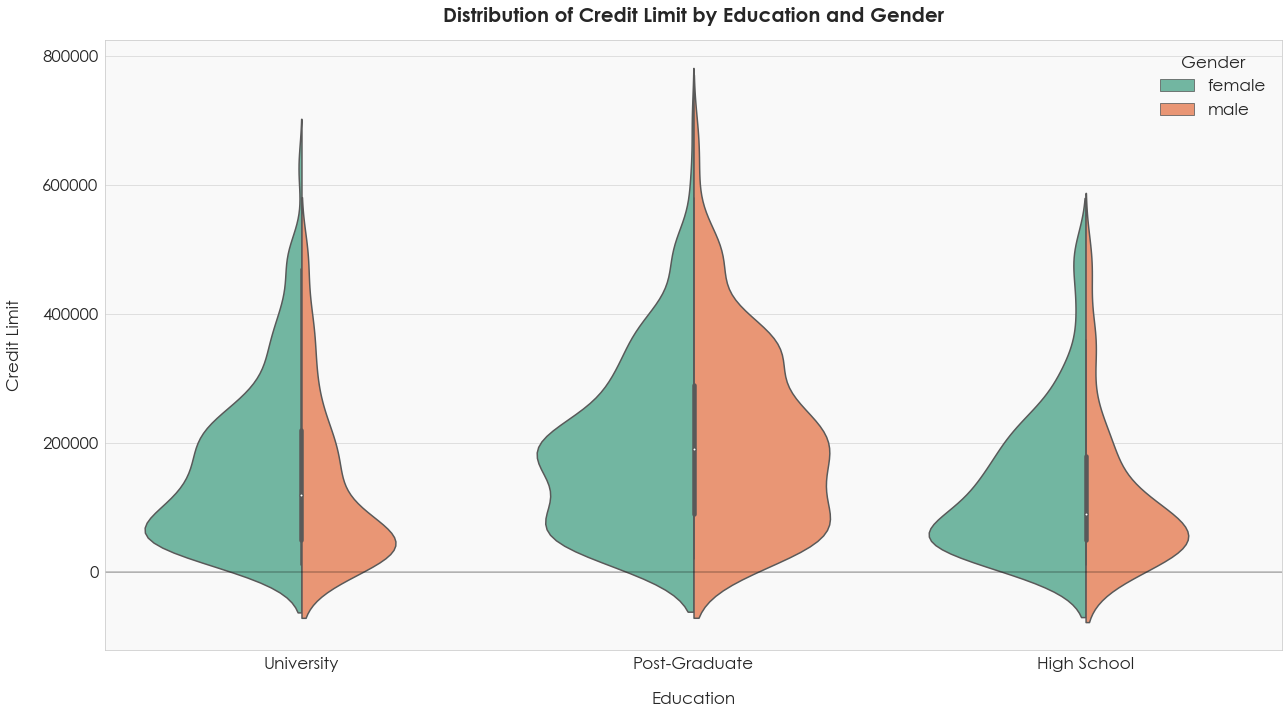

In [5]:
# Graph 1 : Distribution of credit limit provided based on education and gender 

# Set the style and font for the plot
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Create the violin plot
plt.figure(figsize=(18, 10))
sns.violinplot(x='Education', y='Credit Limit', hue='Gender', data=credit_df,
               split=True, scale='count', palette='Set2')

# Set the title and labels
plt.title('Distribution of Credit Limit by Education and Gender', fontsize=20, y=1.02, fontweight=600)
plt.xlabel('Education', fontsize=17, labelpad=20)
plt.ylabel('Credit Limit', fontsize=17, labelpad=20)

# Set font properties for ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Customize the legend
plt.legend(title='Gender',loc='upper right', frameon=False, fontsize=17, title_fontsize=17)

# Add grid lines
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Set background color
plt.gca().set_facecolor('#F9F9F9')

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linewidth=0.4)

# Change the xtick labels
xtick_labels = ['University', 'Post-Graduate', 'High School']
plt.gca().set_xticklabels(xtick_labels)

# Display the plot
plt.tight_layout()
plt.show()

### GRAPH 2 : COMPARISON OF CREDIT LIMIT DISTRIBUTION FOR DEFAULT AND NON-DEFAULT PAYMENTS

- The shorter height of the histogram for default payments indicates that instances of default are relatively less frequent compared to non-default cases. This suggests that the majority of the bank's customers are creditworthy and successfully make their payments without defaults.


- Specifically for default payments, the histogram highlights a higher frequency of individuals defaulting for lower credit limit ranges, particularly those below $100,000. This observation suggests that individuals with lower credit limits are at a higher risk of defaulting, possibly due to financial constraints or difficulties in managing their debts. This underscores the notion that lower credit limits pose a higher risk of default among individuals.


- In contrast, the histogram of non-default payments demonstrates a wider distribution of credit limits. This wider range signifies greater variability in the creditworthiness and financial profiles of successful borrowers. On the other hand, the histogram for default payments shows a slightly narrower credit limit distribution, indicating a more consistent level of credit risk and potentially stricter lending criteria for customers prone to default.

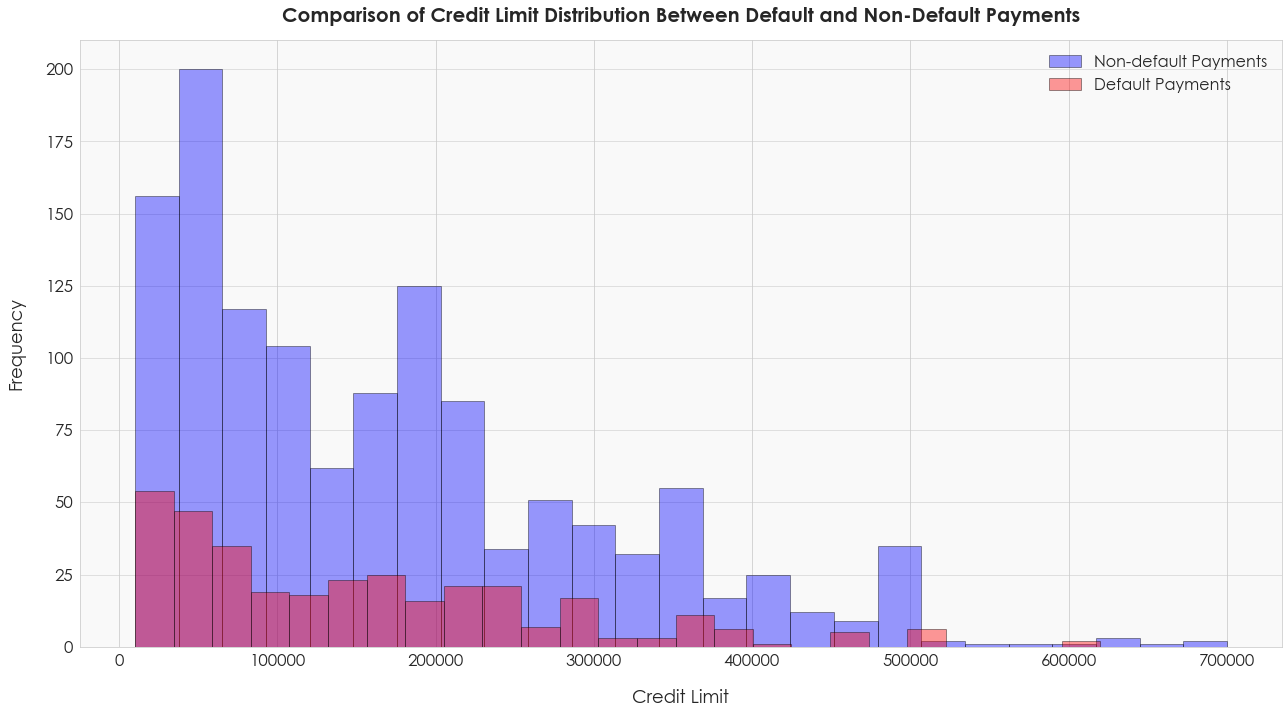

In [6]:
# Graph 2 : Comparison of credit limit distribution for default and non-default payments

# Set the style and font for the plot
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Extract the necessary columns from the dataset
credit_limit_default = credit_df[credit_df['Default Payment Next Month'] == 1]['Credit Limit'] # will not pay
credit_limit_non_default = credit_df[credit_df['Default Payment Next Month'] == 0]['Credit Limit'] # will pay

# Plotting the histograms
plt.figure(figsize=(18,10))

# Plot the histogram of credit limit for non-default payments
plt.hist(credit_limit_non_default, bins=25, color='blue', alpha=0.4, label='Non-default Payments', edgecolor='black')

# Plot the histogram of credit limit for default payments
plt.hist(credit_limit_default, bins=25, color='red', alpha=0.4, label='Default Payments', edgecolor='black')

# Add grid lines
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Set background color
plt.gca().set_facecolor('#F9F9F9')

# Add labels and title
plt.xlabel('Credit Limit', fontsize=18, labelpad=20)
plt.ylabel('Frequency', fontsize=18, labelpad=20)
plt.title('Comparison of Credit Limit Distribution Between Default and Non-Default Payments', fontsize=20, y=1.02, fontweight=600)

# Set font properties for ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Customize the legend
plt.legend(loc='upper right', frameon=False, fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

### GRAPH 3 : EXPLORING THE IMPACT OF CREDIT LIMIT ON SPENDING AND PAYMENT BEHAVIOR

- The regression plot illustrates a weak positive correlation between credit limit, bill amount and payment amount. As the credit limit increases, both the bill and pay amount tend to increase as well. This suggests that customers of the bank with higher credit limits tend to have higher bill amounts and make larger payments.


- But, with a significant number of outliers above the trend line, it indicates there are many cases where the average bill and payments are substantially higher than what is expected based on credit limit. These potentially represent individuals who are high-income earners with substantial assets, who have the capacity to maintain significantly higher bill and payment amounts compared to an average customer within a given credit limit range.


- The trend line for the bill being higher than payment amount suggests that customers tend to accumulate a higher bill compared to the amount paid, indicating that customers are using a significant portion of their available credit and carry balances from month to month. This difference can be attributed to various factors, such as customers choosing to make minimum payments or pay only a portion of their bill each month, leading to a smaller payment amount compared to the total bill. Others may have specific financial obligations or prioritize certain expenses, resulting in a lower payment relative to the bill amount.


- While the trend line shows the average relationship between credit limit, bill and payment amounts, individual behaviors and financial situations can vary significantly. The presence of outliers in the regression plot indicates that there are customers who deviate from the general trend and have much higher bill or payment amounts, highlighting the diversity in financial behaviors and circumstances among the bank's customer base.

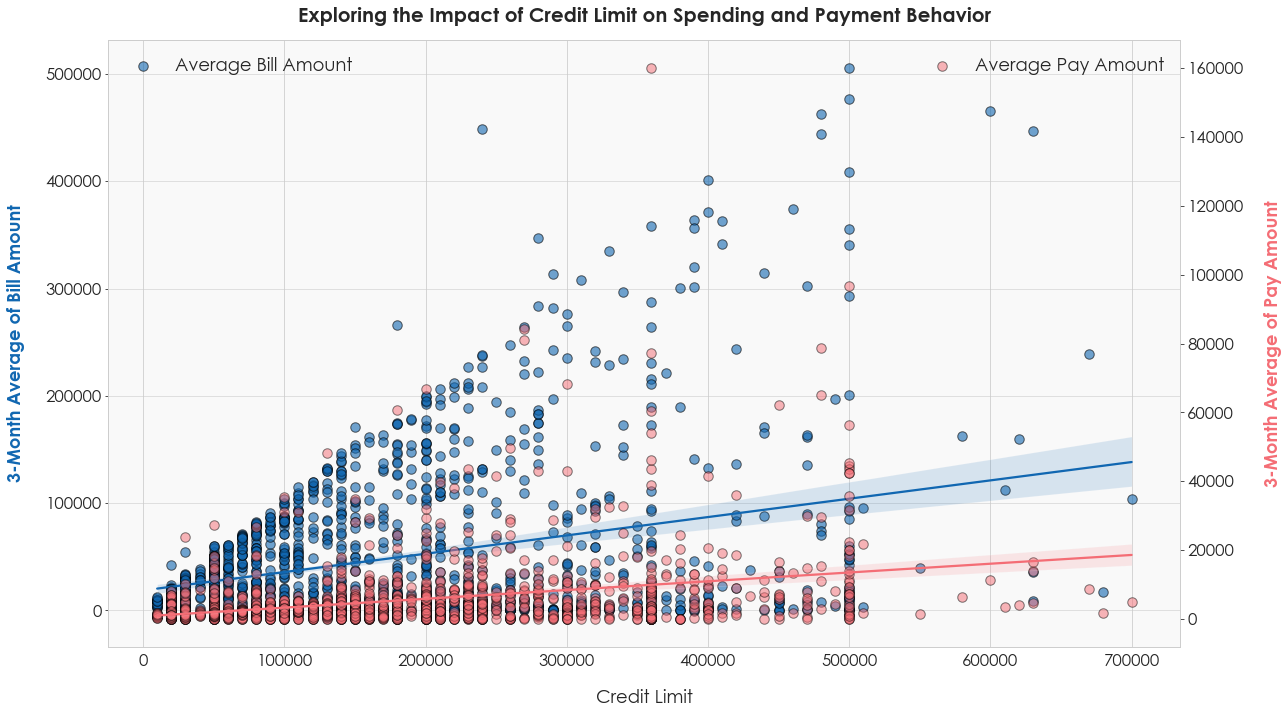

In [7]:
# Graph 3 : Exploring how credit limit affects spending and payment behavior

# Set the style and font for the plot
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Create a copy of the dataset for this visualisation
credit_df_copy = credit_df.copy()

# Compute average bill amount and average pay amount
credit_df_copy['Avg_Bill_Amount'] = credit_df_copy[['Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3']].mean(axis=1)
credit_df_copy['Avg_Pay_Amount'] = credit_df_copy[['Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3']].mean(axis=1)

# Plotting the relationships using regplot
plt.figure(figsize=(18,10))
ax1 = plt.gca()

sns.regplot(x='Credit Limit', y='Avg_Bill_Amount', data=credit_df_copy, ax=ax1, scatter_kws={'s': 90, 'alpha': 0.6, 'edgecolor': 'black'}, label='Average Bill Amount', color='#1167B1')
ax2 = ax1.twinx()
sns.regplot(x='Credit Limit', y='Avg_Pay_Amount', data=credit_df_copy, ax=ax2, scatter_kws={'s': 90, 'alpha': 0.5, 'edgecolor': 'black'}, label='Average Pay Amount', color='#F46D75')

# Add grid lines
ax1.grid(axis='y', linestyle='-', alpha=0.7)
ax2.grid(False)

# Set background color
ax1.set_facecolor('#F9F9F9')

# Set font properties for ticks
ax1.tick_params(axis='both', labelsize=17)
ax2.tick_params(axis='both', labelsize=17)

plt.title('Exploring the Impact of Credit Limit on Spending and Payment Behavior', fontsize=20, y=1.02, fontweight=600)
ax1.set_xlabel('Credit Limit', fontsize=18, labelpad=20)
ax1.set_ylabel('3-Month Average of Bill Amount', fontsize=18, labelpad=20, color='#1167B1', fontweight='bold')
ax2.set_ylabel('3-Month Average of Pay Amount', fontsize=18, labelpad=20, color='#F46D75', fontweight='bold')
ax1.legend(frameon=False, fontsize=18, loc='upper left')
ax2.legend(frameon=False, fontsize=18, loc='upper right')

plt.tight_layout()
plt.show()

### FEATURE PROCESSING AND REPRESENTATION OF DATA
- To process and represent the features, create a copy of the original dataset using .copy() and drop unused columns.


- Use pandas to create dummy variables for categorical variables in the dataset, using the pandas 'get_dummies()' function , representing them as binary variables (0 or 1) for model training.


- Rename the columns created from the dummy variables using a dictionary and display the corrected dataset upon performing feature representation.

In [8]:
# Feature Representation of the Dataset

# Create a copy of the original dataset
credit_df_final = credit_df.copy()

# Drop unnecessary columns from the dataset
credit_df_final.drop('Customer ID', axis=1, inplace=True)

# Create dummy variables for categorical features
categorical_vars = ['Gender', 'Education', 'Marriage Status']
credit_df_final = pd.get_dummies(credit_df_final, columns=categorical_vars)

# Rename the columns to ensure standardisation in capitalisation
column_rename = {
    'Gender_female': 'Gender_Female',
    'Gender_male': 'Gender_Male',
    'Education_high school': 'Education_High School',
    'Education_post-graduate': 'Education_Post-Graduate',
    'Education_university': 'Education_University',
    'Marriage Status_married': 'Marriage Status_Married',
    'Marriage Status_single': 'Marriage Status_Single'
}

# Rename the columns using the mapping dictionary
credit_df_final = credit_df_final.rename(columns=column_rename)

# Displaying first 5 and last 5 rows of the modified dataset
print("CREDIT_DF Dataset After Performing Categorical Encoding :")
credit_df_final.head()

CREDIT_DF Dataset After Performing Categorical Encoding :


,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default Payment Next Month,Gender_Female,Gender_Male,Education_High School,Education_Post-Graduate,Education_University,Marriage Status_Married,Marriage Status_Single
0,20000,24,3913,3102,689,0,689,0,1,1,0,0,0,1,1,0
1,120000,26,2682,1725,2682,0,1000,1000,1,1,0,0,0,1,0,1
2,90000,34,29239,14027,13559,1518,1500,1000,0,1,0,0,0,1,0,1
3,50000,37,46990,48233,49291,2000,2019,1200,0,1,0,0,0,1,1,0
4,50000,57,8617,5670,35835,2000,36681,10000,0,0,1,0,0,1,1,0


### SPLITTING THE DATA FOR TRAINING AND TESTING

1. Splitting the Data 

    - The dataset is divided into two components: features (X) and the target variable (y), which is essential for training and testing the model accurately.
    - The features (X) are obtained by excluding the 'Default Payment Next Month' column from the credit_df_final DataFrame, using the drop function with the axis parameter set to 1.
    - The target variable (y) is extracted from the credit_df_final DataFrame, specifically the 'Default Payment Next Month' column.
    
    
2. Splitting into Training and Testing Sets

    - The function splits the data into four sets: X_train (features for training), X_test (features for testing), y_train (target variable for training), and y_test (target variable for testing). The test_size parameter of 0.2 specifies the proportion of the data to be allocated for testing of the data.

In [9]:
# Splitting the Data for Model

# Split the data into features (X) and the target variable (y)
X = credit_df_final.drop(['Default Payment Next Month'], axis = 1)
y = credit_df_final['Default Payment Next Month']
print("Dimensions of the DataFrame:")
print(X.shape, y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21, stratify=y)

Dimensions of the DataFrame:
(1600, 15) (1600,)


### HANDLING IMBALANCED DATA USING OVERSAMPLING
- To create duplicate examples from the minority class (Default = 1), use RandomOverSampler to perform oversampling on the dataset.
- Set sampling_strategy to minority to generate synthetic samples only for the minority class.
- To generate resampled data, use fit_resample on the training data.
- View the class distributions before and after resampling using .value_counts() to assess the counts for bank customers who defaulted and those who paid their dues.

Original Class Distribution:
 0    1008
1     272
Name: Default Payment Next Month, dtype: int64

Resampled Class Distribution:
 0    1008
1    1008
Name: Default Payment Next Month, dtype: int64


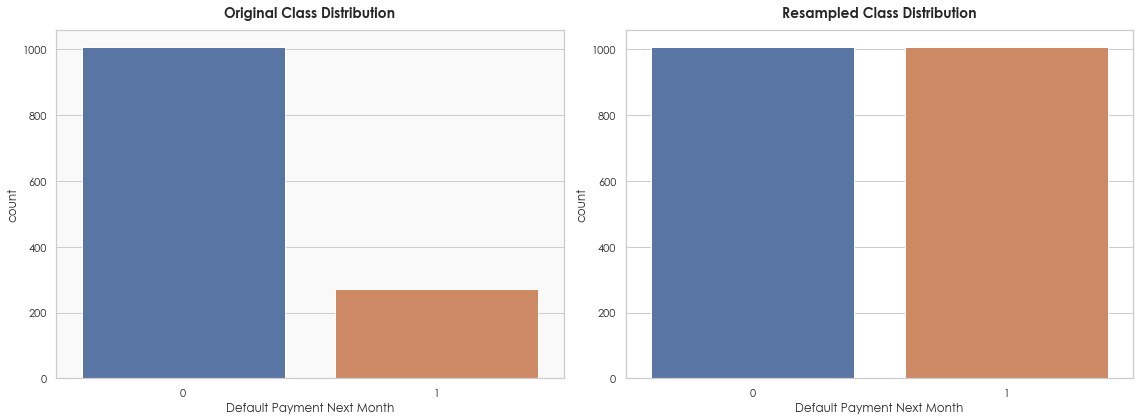

In [10]:
# Handling of imbalanced data using Oversampling
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Verify the class distributions after applying RandomOverSampler
print("Original Class Distribution:\n", y_train.value_counts())
print("\nResampled Class Distribution:\n", y_train_resampled.value_counts())

# Visualizing in a bar graph

# Create a bar graph showing the differences in class distribution
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Century Gothic'

# Plot the original class distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Original Class Distribution", fontweight='bold', fontsize=14, y=1.02)
plt.gca().set_facecolor('#F9F9F9')

# Plot the resampled class distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title("Resampled Class Distribution", fontweight='bold', fontsize=14, y=1.02)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the bar graph
plt.show()

### SCALING AND NORMALIZING NUMERICAL FEATURES
To ensure consistency and comparability among the numerical features in the dataset, apply MaxAbsScaler to normalize the features. This scaler normalizes the numerical features by dividing each value by the maximum absolute value within that feature. This approach maintains the original distribution of the data while scaling it within the range of -1 to 1. 

By applying MaxAbsScaler, the numerical features in the dataset have been transformed to a standardized scale between -1 and 1. This normalization ensures that the numerical variables have consistent magnitudes and eliminates any potential bias that might arise from the original scale of the features.

In [11]:
# Normalizing the numerical features

# Use MaxAbsScaler to scale and transform the training and test data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Displaying transformed data
print(f"Scaled Training Data : \n\n{X_train_scaled}")
print(f"\nScaled Test Data : \n\n{X_test}")

Scaled Training Data : 

[[0.2        0.37333333 0.05209503 ... 1.         0.         1.        ]
 [0.02857143 0.32       0.03729768 ... 1.         0.         1.        ]
 [0.51428571 0.38666667 0.0312255  ... 0.         0.         1.        ]
 ...
 [0.35714286 0.54666667 0.00263528 ... 0.         0.         1.        ]
 [0.04285714 0.29333333 0.05591008 ... 1.         0.         1.        ]
 [0.07142857 0.30666667 0.092674   ... 1.         0.         1.        ]]

Scaled Test Data : 

[[2.85714286e-01 4.00000000e-01 3.86096044e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.71428571e-01 3.73333333e-01 7.68130842e-04 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [7.14285714e-02 4.80000000e-01 1.02358359e-02 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [1.28571429e-01 3.20000000e-01 3.45146792e-02 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [5.71428571e-01 4.13333333e-01 3.99821951e-04 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [7.14285

### SELECTING THE BEST LEARNING ALGORITHM
### CROSS-VALIDATION OF DIFFERENT MODELS
- Compare the performance of different classifiers using cross-validation where cv = 6.
- Obtain the median score for each model and plot them using boxplots.
- The higher the median score, the better the model for classification.
- From the cross-validation, it is clear that the <b>Random Forest Classifier</b> provides the best performance with a score of 92%.

Cross-Validation Scores for Each Model :
- Random Forest Median Cross-Validation Score: 0.9211309523809523
- Gradient Boosting Median Cross-Validation Score: 0.7633928571428571
- Decision Tree Median Cross-Validation Score: 0.875
- KNN Median Cross-Validation Score: 0.6711309523809523
- Naive Bayes Median Cross-Validation Score: 0.5342261904761905
- Logistic Regression Median Cross-Validation Score: 0.5327380952380952

Cross-Validation Scores :
Random Forest Median Cross-Validation Score: 0.9211309523809523
Gradient Boosting Median Cross-Validation Score: 0.7633928571428571
Decision Tree Median Cross-Validation Score: 0.875
KNN Median Cross-Validation Score: 0.6711309523809523
Naive Bayes Median Cross-Validation Score: 0.5342261904761905
Logistic Regression Median Cross-Validation Score: 0.5327380952380952


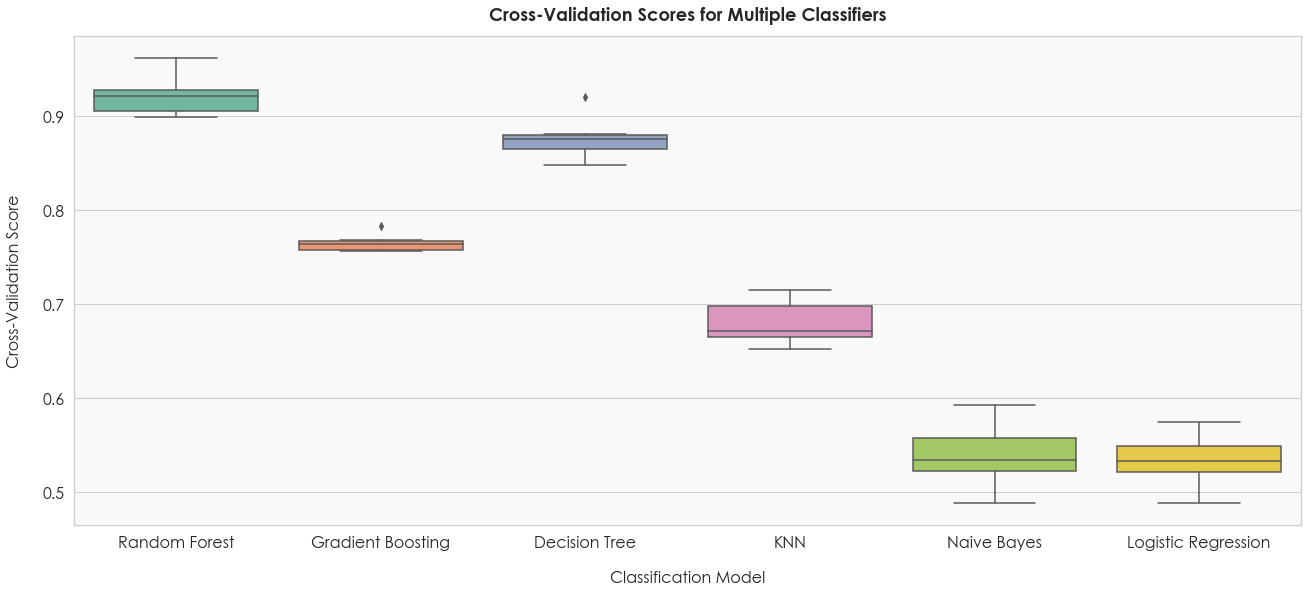

In [12]:
# Cross-Validation of Models

# Initialize the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Perform cross-validation and collect scores for each classifier
cv_scores = {}
print("Cross-Validation Scores :")
for clf_name, classifier in classifiers.items():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    scores = cross_val_score(classifier, X_train_scaled, y_train_resampled, cv=kf)
    cv_scores[clf_name] = scores
    print(f"{clf_name} Median Cross-Validation Score:", np.median(scores))
    
# Set the style and font for the plot
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Convert the cv_scores dictionary to a DataFrame
df_scores = pd.DataFrame(cv_scores)

# Plotting the results in a boxplot with median values
plt.figure(figsize=(22,9))
sns.boxplot(data=df_scores, palette='Set2')
plt.gca().set_facecolor('#F9F9F9')
plt.xlabel('Classification Model', fontsize=16, labelpad=20)
plt.ylabel('Cross-Validation Score', fontsize=16, labelpad=20)
plt.title('Cross-Validation Scores for Multiple Classifiers', fontsize=18, fontweight='bold', y = 1.02)

# Set font properties for ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

### COMPARING TRAINING AND TESTING ACCURACIES
- Between train and test accuracies, it is clear that the model's accuracy is much higher on the training set compared to the test set.
- The accuracy for the training set ranges between 0.93 to 1.0, while the accuracy for the testing set ranges between 0.66 to 0.78.

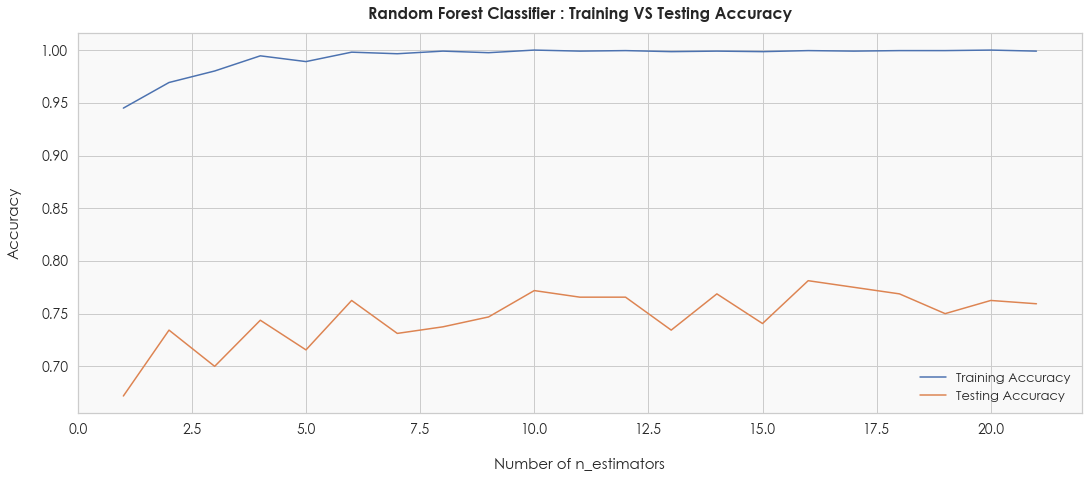

In [13]:
# Visualizing Train and Testing Accuracies

train_accuracies = {}
test_accuracies = {}

n_estimators = np.arange(1, 22)

for n_estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_estimator)
    rf.fit(X_train_scaled, y_train_resampled)
    train_accuracies[n_estimator] = rf.score(X_train_scaled, y_train_resampled)
    test_accuracies[n_estimator] = rf.score(X_test, y_test)

plt.figure(figsize=(18, 7))
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Century Gothic'

plt.title("Random Forest Classifier : Training VS Testing Accuracy", y=1.02, fontsize=16, fontweight='bold')
plt.plot(n_estimators, train_accuracies.values(), label="Training Accuracy")
plt.plot(n_estimators, test_accuracies.values(), label="Testing Accuracy")
plt.gca().set_facecolor('#F9F9F9')
plt.legend(frameon=False, fontsize=13)
plt.xlabel("Number of n_estimators", labelpad=20, fontsize=15)
plt.ylabel("Accuracy", labelpad=20, fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

### FINETUNING THE RANDOM FOREST ALGORITHM
- Create a param_grid to finetune and improve the algorithm for Random Forest.
- Perform GridSearchCV to extensively search for the best parameters that can provide the best scores.
- Fit the best parameters to the model for training.

Parameters in the Param Grid :
- n_estimators : Number of decision trees to be used in the Random Forest Ensemble
- max_depth : Maximum depth allowed for each decision tree in the Random Forest
- min_samples_split : Controls overfitting by preventing splits with a low number of samples
- min_samples_leaf : Minimum number of samples required to be present in a leaf node
- criterion : ‘Gini’ and ‘Entropy’ are used to evaluate the quality of a split in decision trees
- class_weight : Used to adjust the importance for Class 0 and 1 and address imbalance issues

In [24]:
# Testing and Finetuning the model: Random Forest

# Define the parameter grid
param_grid = {
    'n_estimators':[22, 23, 24],
    'max_depth': [21, 24, 25],
    'min_samples_split':[5, 6, 7],
    'min_samples_leaf': [4, 5, 6],
    'criterion':['gini','entropy'],
    'class_weight': [{0: 1, 1: 50}]
}

# Perform grid search cross-validation
rf_tuned = RandomForestClassifier(random_state=21)
rf_tuned = GridSearchCV(rf_tuned, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
rf_tuned.fit(X_train_scaled, y_train_resampled)

# Retrieve the best parameters and score from the grid search
best_params = rf_tuned.best_params_
best_score = rf_tuned.best_score_

print("Best Parameters:", best_params)
print("\nBest Score:", best_score)
print("\n", rf_tuned.get_params())

Best Parameters: {'class_weight': {0: 1, 1: 50}, 'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 22}

Best Score: 0.7132692921897649

 {'cv': 5, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'sqrt', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 21, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(random_state=21), 'n_jobs': None, 'param_grid': {'n_estimators': [22, 23, 24], 'max_depth': [21, 24, 25], 'min_samples_split': [5, 6, 7], 'min_samples_leaf

## RE-FITTING THE MODEL WITH HYPERPARAMETERS
- Initialize and fit the Random Forest Classifier to the model using .predict() to the testing set.
- Predict on the testing set and generate the classification report and confusion matrix.


Accuracy: 0.575

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.54      0.67       252
           1       0.30      0.72      0.42        68

    accuracy                           0.57       320
   macro avg       0.59      0.63      0.54       320
weighted avg       0.75      0.57      0.61       320

Confusion Matrix:
 [[135 117]
 [ 19  49]]


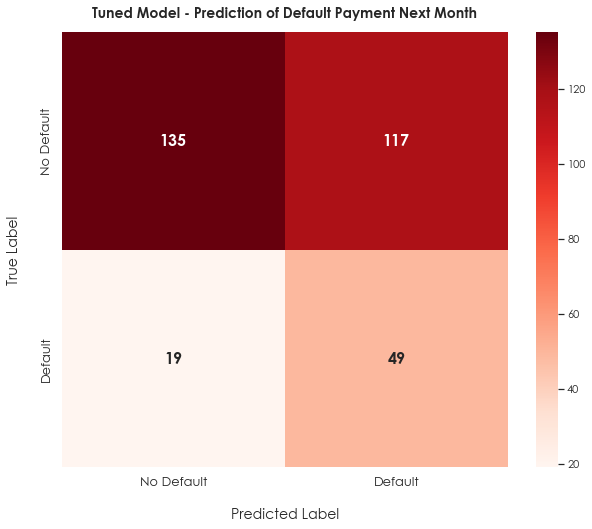

In [25]:
# Refitting Using Tuned Random Forest Classifier

# Make predictions and expectations on the test set
y_pred = rf_tuned.predict(X_test)
predicted = y_pred
expected = y_test

# Evaluating the model
accuracy = accuracy_score(y_test, predicted)
report = classification_report(expected, predicted, zero_division=0)
confusion = confusion_matrix(expected, predicted)

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", confusion)

# Create a heatmap for the confusion matrix 
plt.figure(figsize=(10, 8))
# Define the class labels
class_labels = ["No Default", "Default"]

sns.heatmap(confusion, annot=True, fmt="d", cmap="Reds", annot_kws={"fontsize": 16, "fontweight": "bold"})
plt.title("Tuned Model - Prediction of Default Payment Next Month", fontsize=14, y=1.02, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=14, labelpad=20)
plt.ylabel("True Label", fontsize=14, labelpad=20)

# Update x-axis and y-axis labels
plt.xticks(ticks=[0.5, 1.5], labels=class_labels, fontsize=13)
plt.yticks(ticks=[0.5, 1.5], labels=class_labels, fontsize=13)

plt.show()

### ANALYZING THE RESULTS OF THE CLASSIFICATION REPORT

True Positives (TP): 49;
False Positives (FP): 117;
True Negatives (TN): 135;
False Negatives (FN): 19;

- To meet the bank's objective of identifying customers likely to default on payment (Class 1), recall is used. It measures the proportion of true positives among all positive cases. 


- By optimizing recall for Class 1, the model minimizes false negatives (misclassified defaults) and improves the detection of actual default cases, with a score of 0.72. The model was able to predict 49 defaults correctly, and only predicted 19 defaults incorrectly.


- Recall for Class 1 is more crucial, as the consequences for misclassifying default cases are severe, leading to potential financial losses for the bank.

### ASSESSING THE FEATURE IMPORTANCES OF THE COLUMNS IN THE DATASET
### FEATURE IMPORTANCE OF RANDOM FOREST

- Identify the most important features in the dataset that affects model performance using feature_importances.
- Sort the importances to show the most important feature at the top of the chart.
- From the graph, it is clear that the most important feature is 'Pay_Amount1' : Amount customer paid from 1 month ago
- This indicates that the historical pay amount from 1 month ago makes a significant contribution to the model's ability to make accurate predictions.

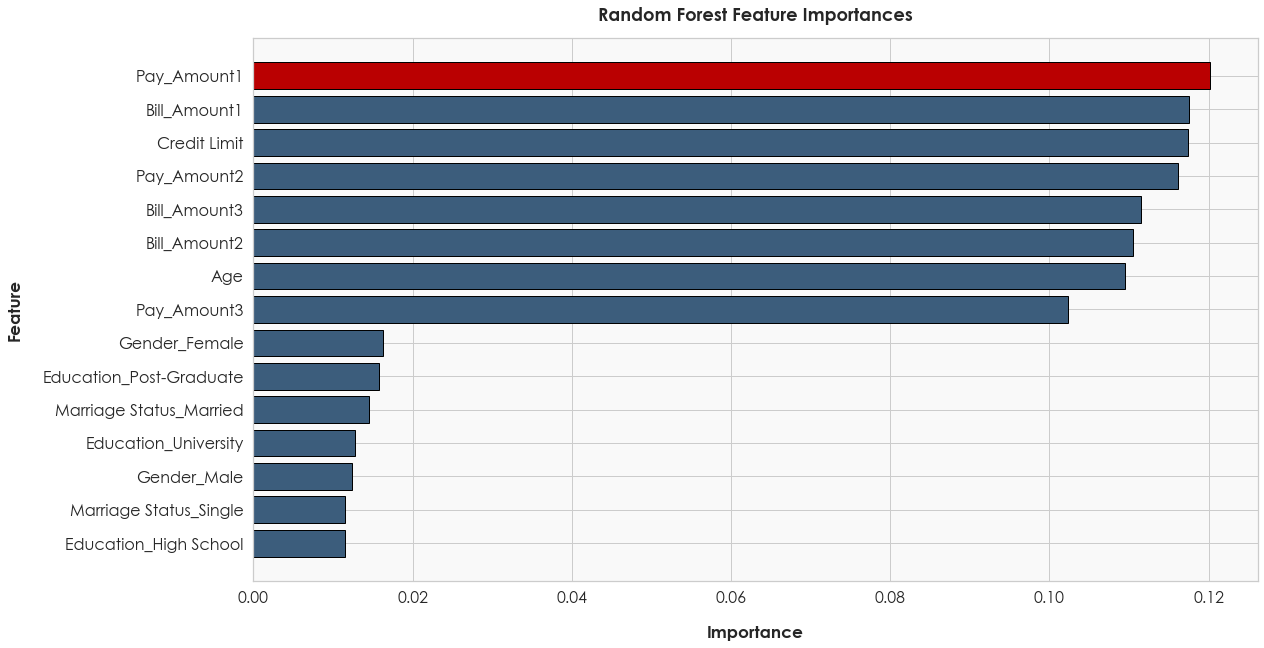

In [18]:
# Random Forest Feature Importances
feature_importances = rf.feature_importances_
feature_names = X.columns

# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the feature importances in ascending order
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=False)

# Extract the feature names and importances
features = [item[0] for item in sorted_importances]
importances = [item[1] for item in sorted_importances]

# Set the color for the most important feature
colors = ['#3C5D7C'] * (len(features) - 1) + ['#BA0001'] 

# Customise the bar chart
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Create a horizontal bar chart
plt.figure(figsize=(18,10))
plt.barh(features, importances, color=colors, edgecolor='black')

# Set background color
plt.gca().set_facecolor('#F9F9F9')

plt.xlabel('Importance', fontsize=17, labelpad=20, fontweight='semibold')
plt.ylabel('Feature', fontsize=17, labelpad= 20, fontweight='semibold')
plt.title('Random Forest Feature Importances', fontsize=18, y=1.02, fontweight='bold')

# Set font properties for ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

### PROBABILITY THRESHOLDS WITH ROC CURVE
- The ROC Curve is able to predict the probabilities of the positive class (Class 1) for X_test data upon model tuning.
- Based on the ROC Curve, the model provides an AUC (Area Under the Curve) of 0.64.
- This indicates that the model has a fair discriminatory ability and can effectively differentiate between Class 0 and 1 to a reasonable extent.

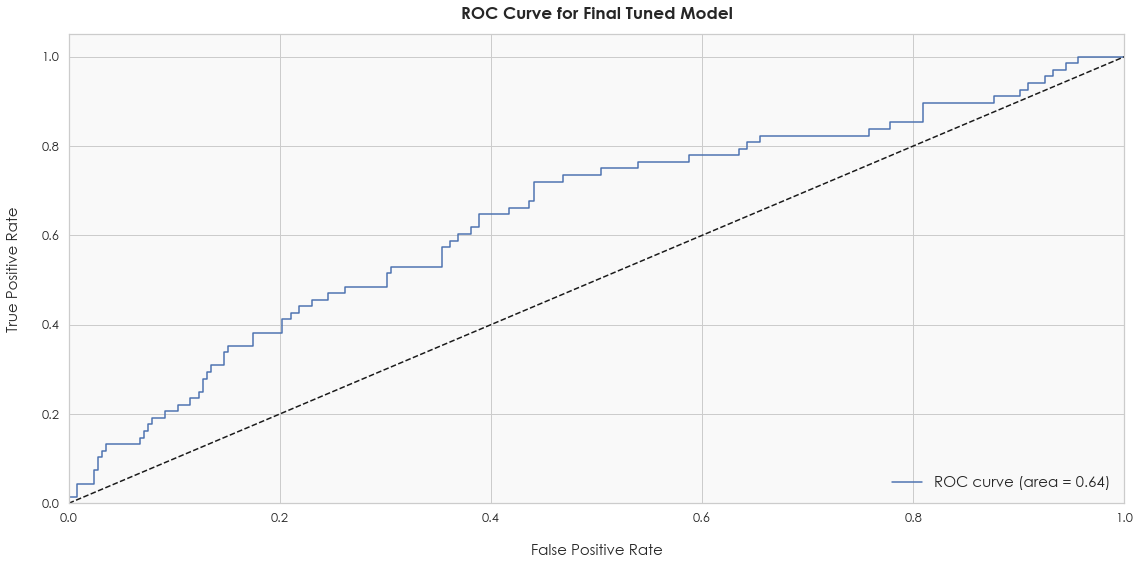

In [26]:
# Obtain Probability Thresholds with ROC Curve

y_probs_after = rf_tuned.predict_proba(X_test)[:, 1]
fpr_after, tpr_after, thresholds_after = roc_curve(y_test, y_probs_after)
roc_auc_after = auc(fpr_after, tpr_after)

# Plotting the ROC curves
sns.set_style('whitegrid')
plt.figure(figsize=(16, 8))
plt.rcParams['font.family'] = 'Century Gothic'

plt.plot(fpr_after, tpr_after, label='ROC curve (area = %0.2f)' % roc_auc_after)
plt.plot([0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15, labelpad=20)
plt.ylabel('True Positive Rate', fontsize=15, labelpad=20)
plt.title('ROC Curve for Final Tuned Model', fontsize=17, fontweight='bold', y=1.02)
plt.legend(loc='lower right', frameon=False, fontsize=15)
plt.gca().set_facecolor('#F9F9F9')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()
plt.show()

### EVALUATING THE MODEL'S QUALITY WITH A DUMMY BASELINE
- Compare the model to a dummy baseline using DummyClassifier with the strategy = 'most_frequent' to make predictions on the most frequent class.
- Create a pipeline to scale the data and create the dummy model.
- Fit the pipeline to the training data and predict on the test set.

From the dummy baseline, the classification report shows that the recall score of the dummy model is 1.00 for Class 0 and 0.00 for Class 1.

Dummy Classifier Evaluation:

Predicted labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       252
           1       0.00      0.00      0.00        68

    accuracy                           0.79       320
   macro avg       0.39      0.50      0.44       320
weight

C:\Users\dario\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(


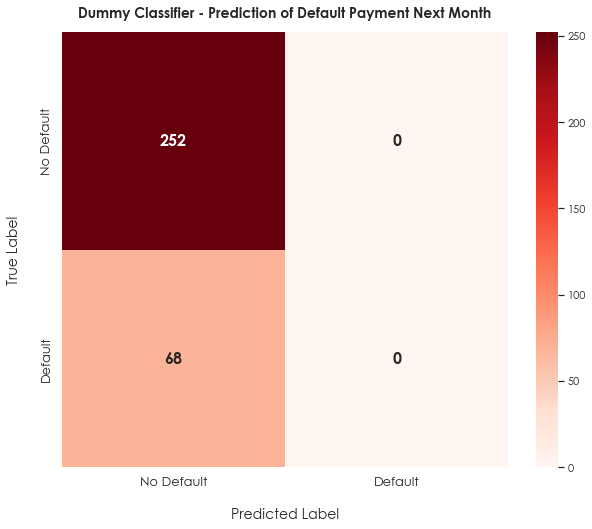

In [21]:
# Comparing the Model to a Dummy Baseline

# Using the Dummy Classifier with "most_frequent" strategy
dummy_clf = DummyClassifier(strategy="most_frequent")

# Create a pipeline with MaxAbsScaler and Dummy Classifier
pipeline = Pipeline([ ("scaler", MaxAbsScaler()), ("dummymodel", dummy_clf)])

# Fit the pipeline on the training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Print the predicted labels
print("Dummy Classifier Evaluation:\n\nPredicted labels:", y_pred)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_pred)

# Define the class labels
class_labels = ["No Default", "Default"]

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds", annot_kws={"fontsize": 16, "fontweight": "bold"})
plt.title("Dummy Classifier - Prediction of Default Payment Next Month", fontsize=14, y=1.02, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=14, labelpad=20)
plt.ylabel("True Label", fontsize=14, labelpad=20)

# Update x-axis and y-axis labels
plt.xticks(ticks=[0.5, 1.5], labels=class_labels, fontsize=13)
plt.yticks(ticks=[0.5, 1.5], labels=class_labels, fontsize=13)

plt.show()

### CONCLUSION GAINED FROM THE CLASSIFICATION ANALYSIS

- Best-performing model : Random Forest Classifier


- From hyperparameter tuning, the best parameters were : {'class_weight': {0: 1, 1: 50}, 'criterion': 'entropy', 'max_depth’: 25, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators’: 22}
- Based on the recall score of 0.72, the model performed well in identifying and predicting customers who are likely to default, meeting the bank’s objective and helping in risk management and decision-making.
- Despite a lower recall score for Class 0 (customers who did not default), it is more important for the bank to predict defaults, to prevent monetary losses, hence this trade-off is considered acceptable.